# Geographic Data

In [1]:
"""
Here's a breakdown of the files we'll be working with and the most pertinent columns from each dataset:
    
    airlines.csv - data on each airline.
        country - where the airline is headquartered.
        active - if the airline is still active.
    
    airports.csv - data on each airport.
        name - name of the airport.
        city - city the airport is located.
        country - country the airport is located.
        code - unique airport code.
        latitude - latitude value.
        longitude - longitude value.
    
    routes.csv - data on each flight route.
        airline - airline for the route.
        source - starting city for the route.
        dest - destination city for the route.
"""

"\nHere's a breakdown of the files we'll be working with and the most pertinent columns from each dataset:\n    \n    airlines.csv - data on each airline.\n        country - where the airline is headquartered.\n        active - if the airline is still active.\n    \n    airports.csv - data on each airport.\n        name - name of the airport.\n        city - city the airport is located.\n        country - country the airport is located.\n        code - unique airport code.\n        latitude - latitude value.\n        longitude - longitude value.\n    \n    routes.csv - data on each flight route.\n        airline - airline for the route.\n        source - starting city for the route.\n        dest - destination city for the route.\n"

In [2]:
import pandas as pd

In [3]:
# Read in the 3 CSV files into 3 separate dataframe objects - airlines, airports, and routes.
# Use the DataFrame.iloc[] method to return the first row in each dataframe as a neat table.
# Display the first rows for all dataframes using the print() function. Try to answer the following questions:
    # What's the best way to link the data from these 3 different datasets together?
    # What are the formats of the latitude and longitude values?
    
airlines = pd.read_csv('C:/Users/Ivor/Documents/Atkin/Data Analysis/DataQuest/IntermediatePythonAndPandas/\
StoryTellingThroughDataVisualization/airlines.csv')

airports = pd.read_csv('C:/Users/Ivor/Documents/Atkin/Data Analysis/DataQuest/IntermediatePythonAndPandas/\
StoryTellingThroughDataVisualization/airports.csv')

routes = pd.read_csv('C:/Users/Ivor/Documents/Atkin/Data Analysis/DataQuest/IntermediatePythonAndPandas/\
StoryTellingThroughDataVisualization/routes.csv')

In [4]:
airlines.head()

,id,name,alias,iata,icao,callsign,country,active
0,1,Private flight,\N,-,NaN,NaN,NaN,Y
1,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N
4,5,213 Flight Unit,\N,NaN,TFU,NaN,Russia,N


In [5]:
airports.head()

,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby
3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10.0,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10.0,U,Pacific/Port_Moresby


In [6]:
routes.head()

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [7]:
airports.dtypes

id             int64
name          object
city          object
country       object
code          object
icao          object
latitude     float64
longitude    float64
altitude       int64
offset       float64
dst           object
timezone      object
dtype: object

# Workflow with Basemap

In [26]:
# run via anaconda
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
"""
To create a new instance of the basemap class, we call the basemap constructor and pass in values for the required parameters: 
    projection: the map projection.
    llcrnrlat: latitude of lower left hand corner of the desired map domain
    urcrnrlat: latitude of upper right hand corner of the desired map domain
    llcrnrlon: longitude of lower left hand corner of the desired map domain
    urcrnrlon: longitude of upper right hand corner of the desired map domain
"""

'\nTo create a new instance of the basemap class, we call the basemap constructor and pass in values for the required parameters: \n    projection: the map projection.\n    llcrnrlat: latitude of lower left hand corner of the desired map domain\n    urcrnrlat: latitude of upper right hand corner of the desired map domain\n    llcrnrlon: longitude of lower left hand corner of the desired map domain\n    urcrnrlon: longitude of upper right hand corner of the desired map domain\n'

In [10]:
# Create a new basemap instance with the following parameters:
# projection: "merc"
# llcrnrlat: -80 degrees
# urcrnrlat: 80 degrees
# llcrnrlon: -180 degrees
# urcrnrlon: 180 degrees
# Assign the instance to the new variable m.

m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)

# Converting From Spherical to Cartesian Coordinates

In [11]:
"""
As we mentioned before, we need to convert latitude and longitude values to Cartesian coordinates to display them on a 
two-dimensional map.

The constructor only accepts list values, so we'll need to use Series.tolist() to convert the longitude and latitude 
columns from the airports dataframe to lists.

Then, we pass them to the basemap instance with the longitude values first then the latitude values:

    x, y = m(longitudes, latitudes)
    
The basemap object will return 2 list objects, which we assign to x and y. Finally, we display the first 5 elements of 
the original longitude values, original latitude values, the converted longitude values, and the converted latitude values.
"""

"\nAs we mentioned before, we need to convert latitude and longitude values to Cartesian coordinates to display them on a \ntwo-dimensional map.\n\nThe constructor only accepts list values, so we'll need to use Series.tolist() to convert the longitude and latitude \ncolumns from the airports dataframe to lists.\n\nThen, we pass them to the basemap instance with the longitude values first then the latitude values:\n\n    x, y = m(longitudes, latitudes)\n    \nThe basemap object will return 2 list objects, which we assign to x and y. Finally, we display the first 5 elements of \nthe original longitude values, original latitude values, the converted longitude values, and the converted latitude values.\n"

In [12]:
# Convert the longitude values from spherical to Cartesian and assign the resulting list to x.
# Convert the latitude values from spherical to Cartesian and assign the resulting list to y.

lon = airports['longitude'].tolist()
lat = airports['latitude'].tolist()

x, y = m(lon, lat)

# Generating a Scatter Plot

In [ ]:
"""
Now that the data is in the right format, we can plot the coordinates on a map. A scatter plot is the simplest way to 
plot points on a map, where each point is represented as an (x, y) coordinate pair. To create a scatter plot from a list 
of x and y coordinates, we use the basemap.scatter() method.

    m.scatter(x,y)
    
The basemap.scatter() method has similar parameters to the pyplot.scatter(). For example, we can customize the size of 
each marker using the s parameter:

    # Large markers.
    m.scatter(x,y,s=10)
    # Smaller markers.
    m.scatter(x,y,s=5)
"""

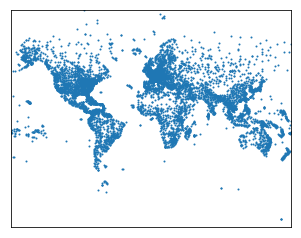

In [19]:
# Create a scatter plot using the converted latitude and longitude values using a marker size of 1.
# Display the scatter plot.

m.scatter(x, y, s=1)
plt.show()

# Customizing The Plot Using Basemap

In [ ]:
"""
You'll notice that the outlines of the coasts for each continent are missing from the map above. We can display the coast 
lines using the basemap.drawcoastlines() method.
"""

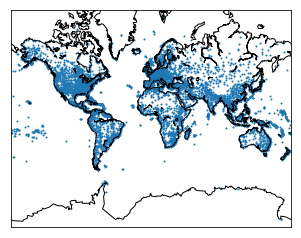

In [22]:
# Use basemap.drawcoastlines() to enable the coast lines to be displayed. 
# Display the plot using plt.show().

m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()

# Customizing the Plot Using Matplotlib

In [ ]:
"""
Because basemap uses matplotlib under the hood, we can interact with the matplotlib classes that basemap uses directly 
to customize the appearance of the map.
We can add code that:
uses pyplot.subplots() to specify the figsize parameter
returns the Figure and Axes object for a single subplot and assigns to fig and ax respectively
use the Axes.set_title() method to set the map title
"""

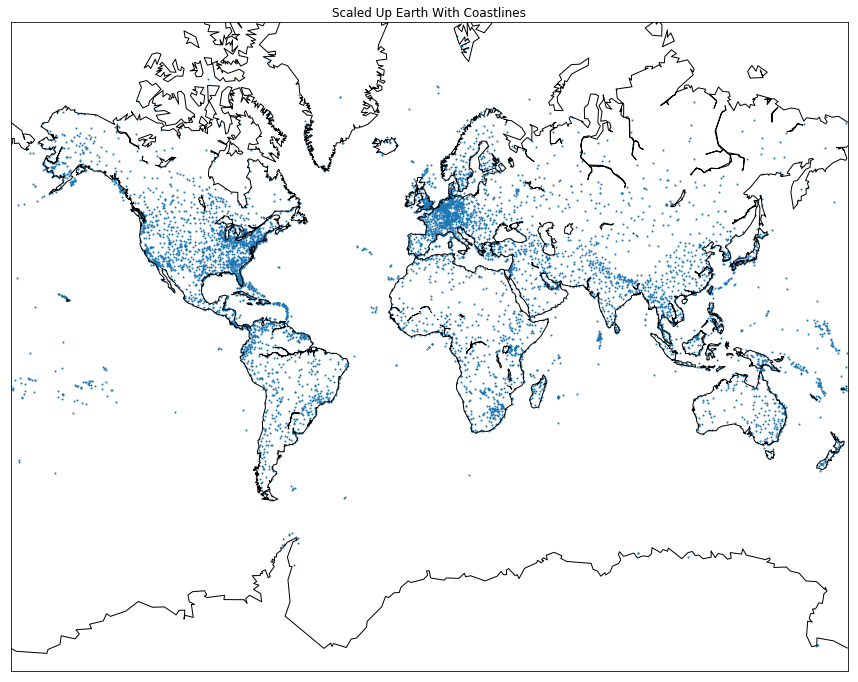

In [25]:
# Before creating the basemap instance and generating the scatter plot, add code that:
# creates a figure with a height of 15 inches and a width of 20 inches
# sets the title of the scatter plot to "Scaled Up Earth With Coastlines"
# basemap has to created after the creating a figure

fig, ax = plt.subplots(figsize=(15,20))
plt.title("Scaled Up Earth With Coastlines")
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()

# Introduction to great circles

In [ ]:
"""
To better understand the flight routes, we can draw great circles to connect starting and ending locations on a map. 
A great circle is the shortest circle connecting 2 points on a sphere. 
"""

In [27]:
# Read geo_routes.csv into a dataframe named geo_routes.
# Use the DataFrame.info() method to look for columns containing any null values.
# Display the first five rows in geo_routes.

geo_routes = pd.read_csv('C:/Users/Ivor/Documents/Atkin/Data Analysis/DataQuest/IntermediatePythonAndPandas/\
StoryTellingThroughDataVisualization/geo_routes.csv')

In [28]:
geo_routes.head()

,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
0,2B,AER,KZN,CR2,39.956589,49.278728,43.449928,55.606186
1,2B,ASF,KZN,CR2,48.006278,49.278728,46.283333,55.606186
2,2B,ASF,MRV,CR2,48.006278,43.081889,46.283333,44.225072
3,2B,CEK,KZN,CR2,61.503333,49.278728,55.305836,55.606186
4,2B,CEK,OVB,CR2,61.503333,82.650656,55.305836,55.012622


In [29]:
geo_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB


# Displaying Great Circles

In [ ]:
"""
We use the basemap.drawgreatcircle() method to display a great circle between 2 points. The basemap.drawgreatcircle() 
method requires four parameters in the following order:

    lon1 - longitude of the starting point.
    lat1 - latitude of the starting point.
    lon2 - longitude of the ending point.
    lat2 - latitude of the ending point.

The following code generates a great circle for the first three routes in the dataframe:

    m.drawgreatcircle(39.956589, 43.449928, 49.278728, 55.606186)
    m.drawgreatcircle(48.006278, 46.283333, 49.278728, 55.606186)
    m.drawgreatcircle(39.956589, 43.449928, 43.081889 , 44.225072)

Unfortunately, basemap struggles to create great circles for routes that have an absolute difference of larger than 
180 degrees for either the latitude or longitude values. This is because the basemap.drawgreatcircle() method isn't able 
to create great circles properly when they go outside of the map boundaries. This is mentioned briefly in the documentation 
for the method:

Note: Cannot handle situations in which the great circle intersects the edge of the map projection domain, and then 
re-enters the domain.
"""

In [ ]:
# Write a function, named create_great_circles() that draws a great circle for each route that has an absolute difference 
# in the latitude and longitude values less than 180. This function should:
    # Accept a dataframe as the sole parameter
    # Iterate over the rows in the dataframe using DataFrame.iterrows()
    # For each row:
        # Draw a great circle using the four geographic coordinates only if:
        # The absolute difference between the latitude values (end_lat and start_lat) is less than 180.
        # If the absolute difference between the longitude values (end_lon and start_lon) is less than 180.
    # Create a filtered dataframe containing just the routes that start at the DFW airport.
        # Select only the rows in geo_routes where the value for the source column equals "DFW".
        # Assign the resulting dataframe to dfw.
    # Pass dfw into create_great_circles() and display the plot using the pyplot.show() function.

In [30]:
def create_great_circles(df):
    for index, row in df.iterrows():
        end_lat, start_lat = row['end_lat'], row['start_lat']
        end_lon, start_lon = row['end_lon'], row['start_lon']
        
        if abs(end_lat - start_lat) < 180:
            if abs(end_lon - start_lon) < 180:
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)

C:\Users\Ivor\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Ivor\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


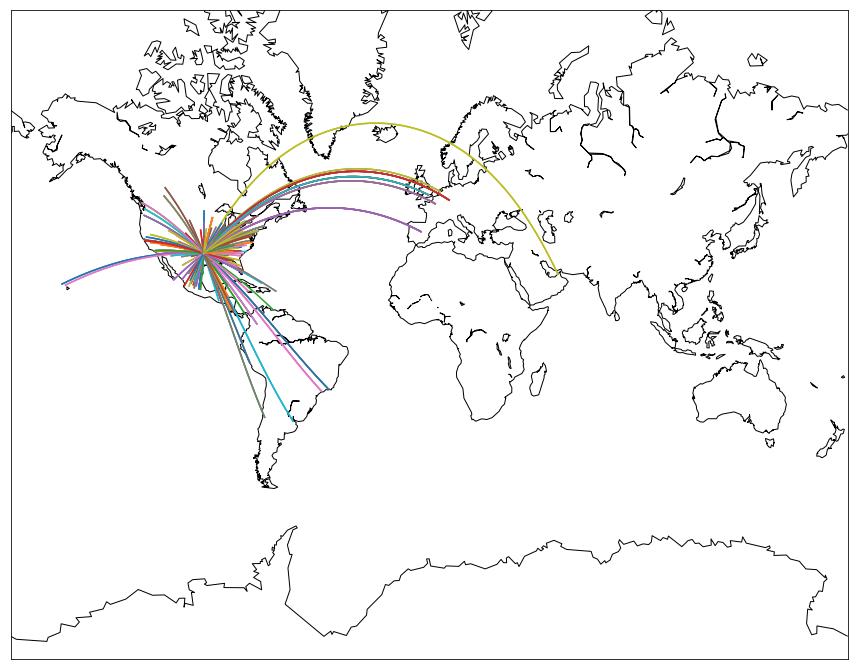

In [31]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

dfw = geo_routes[geo_routes['source'] == "DFW"]
create_great_circles(dfw)
plt.show()